In [2]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [28]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)

<ipython-input-28-dfb2fa719c9f>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)


In [29]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [31]:
index = df.set_index("Month")

In [32]:
index.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


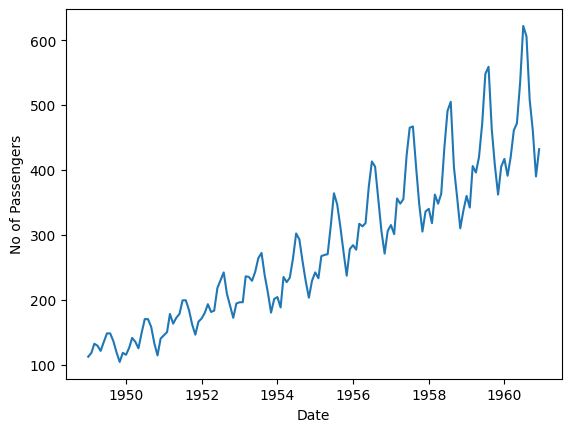

In [35]:
plt.xlabel('Date')
plt.ylabel("No of Passengers")
plt.plot(index)

In [36]:
rolmean = index.rolling(window=12).mean()
rolstd = index.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


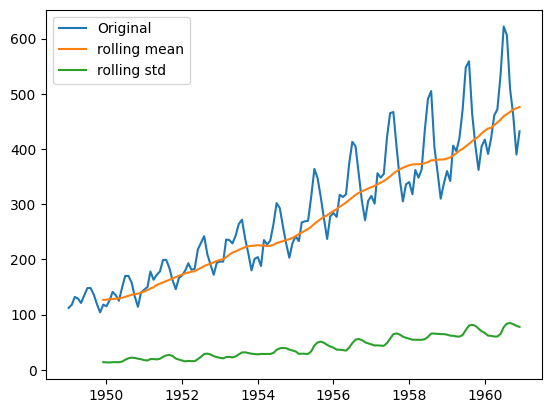

In [37]:
or_data = plt.plot(index,label = "Original")
mean = plt.plot(rolmean,label="rolling mean")
std = plt.plot(rolstd,label="rolling std")

plt.legend(loc = 'best')
plt.show()

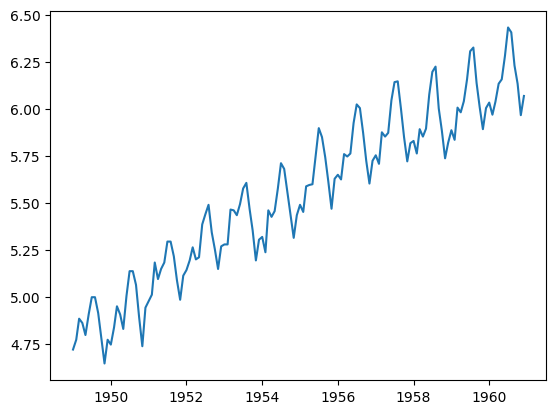

In [38]:
index_log=np.log(index)
plt.plot(index_log)

In [40]:
movingavg= index_log.rolling(window=12).mean()
movingstd= index_log.rolling(window=12).std()

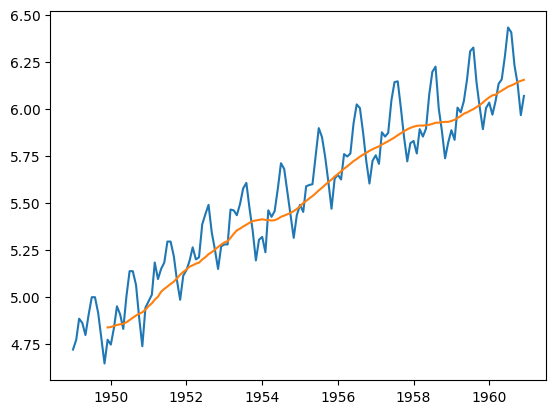

In [41]:
plt.plot(index_log)
plt.plot(movingavg)

In [42]:
index_log_moving_avg= index_log-movingavg
index_log_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [43]:
index_log_moving_avg.dropna(inplace=True)
index_log_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


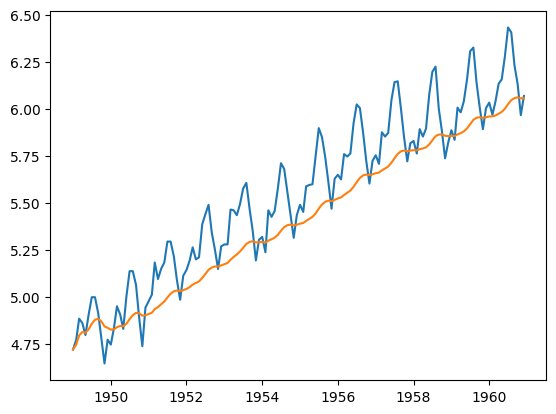

In [45]:
weighted_avg=index_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(index_log)
plt.plot(weighted_avg)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(index_log)
trend= decomp.trend
seasonal= decomp.seasonal
residual= decomp.resid

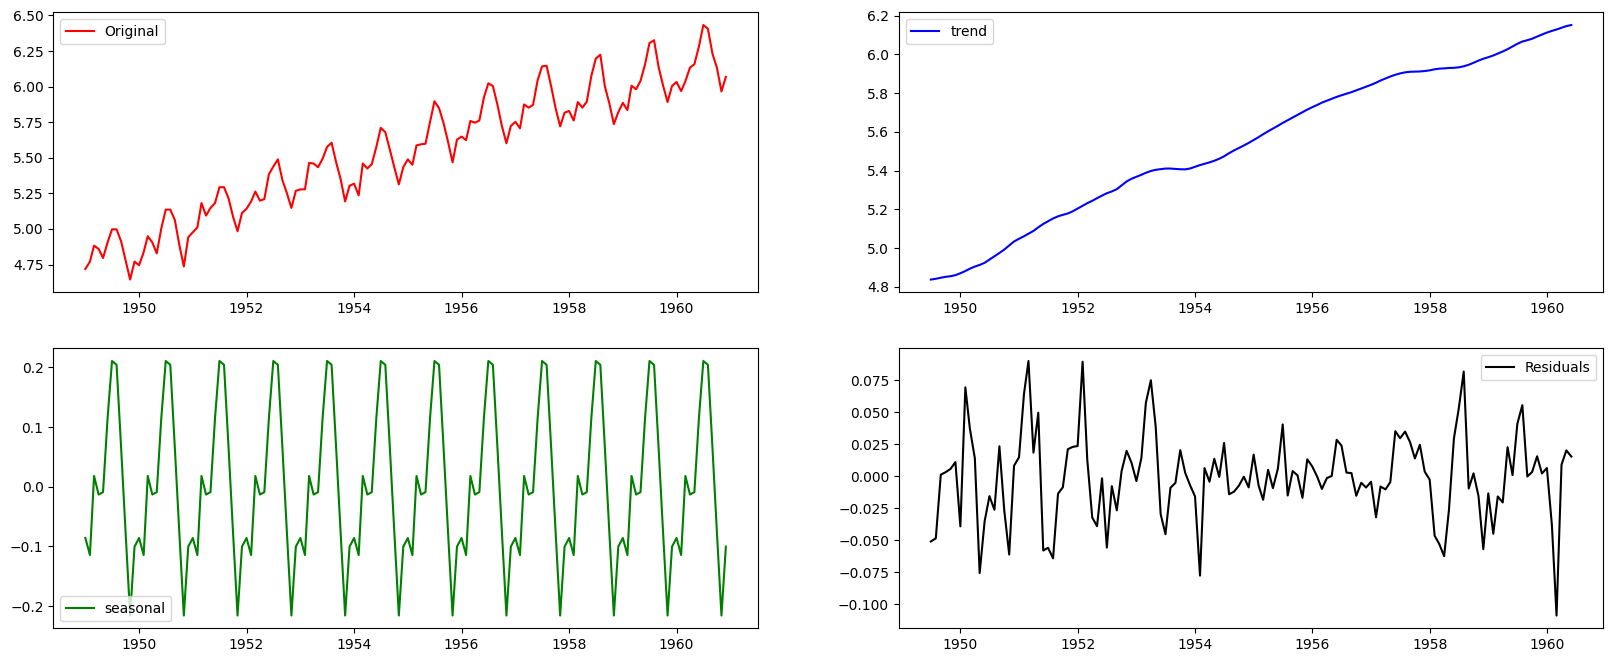

In [60]:
plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
plt.plot(index_log, label='Original',color='red')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.plot(trend, label='trend',color='blue')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(seasonal, label='seasonal',color='green')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals',color='black')
plt.legend(loc='best')


In [69]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
train,test = train_test_split(index_log_moving_avg, test_size=0.10,shuffle=False)
model= ARIMA(train, order=(1,2,2))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [79]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
train, test = train_test_split(index_log_moving_avg, test_size=0.10, shuffle=False)
print(train.shape, type(train))


model = ARIMA(train, order=(1, 2, 1))
model_fit = model.fit()

pred = model_fit.predict(start="1959-11-01", end="1960-12-01")

print(pred)


(119, 1) <class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1959-11-01   -0.039920
1959-12-01   -0.045734
1960-01-01   -0.046857
1960-02-01   -0.047016
1960-03-01   -0.046976
1960-04-01   -0.046895
1960-05-01   -0.046806
1960-06-01   -0.046715
1960-07-01   -0.046624
1960-08-01   -0.046533
1960-09-01   -0.046441
1960-10-01   -0.046350
1960-11-01   -0.046258
1960-12-01   -0.046167
Freq: MS, Name: predicted_mean, dtype: float64


In [78]:
test.tail()

,#Passengers
Month,
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690
1960-12-01,-0.085789


In [85]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test,pred)
print("Test %.3f" % error)

Test 0.026


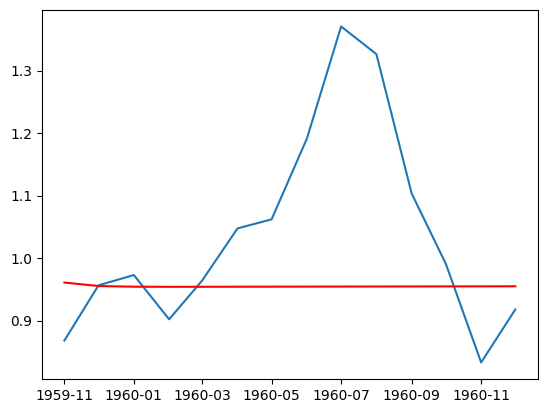

In [86]:
predict = np.exp(pred)
test_set = np.exp(test)
plt.plot(test_set)
plt.plot(predict,color = 'red')
plt.show()

In [109]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
train, test = train_test_split(index_log_moving_avg, test_size=0.10, shuffle=False)
print(train.shape, type(train))


model = ARIMA(train, order=(10, 1, 2))
model_fit = model.fit()

pred = model_fit.predict(start="1959-11-01", end="1960-12-01")

print(pred)


(119, 1) <class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1959-11-01   -0.175998
1959-12-01   -0.082316
1960-01-01   -0.064572
1960-02-01   -0.071025
1960-03-01    0.026053
1960-04-01    0.005628
1960-05-01    0.095099
1960-06-01    0.169256
1960-07-01    0.322449
1960-08-01    0.297699
1960-09-01    0.138196
1960-10-01   -0.011958
1960-11-01   -0.170582
1960-12-01   -0.075923
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test,pred)
print("Test %.3f" % error)

Test 0.001


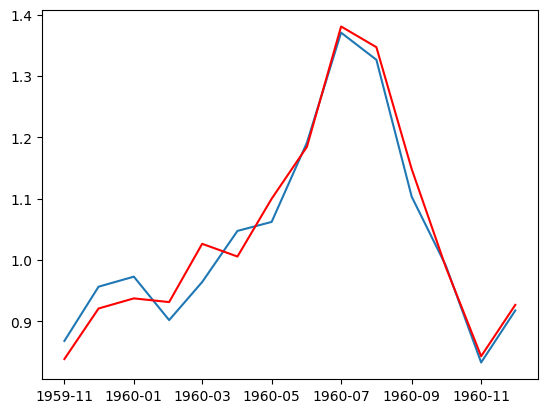

In [111]:
predict = np.exp(pred)
test_set = np.exp(test)
plt.plot(test_set)
plt.plot(predict,color = 'red')
plt.show()